In [28]:
import numpy as np

In [29]:
import pandas as pd

In [30]:
df=pd.read_csv('Alcohol_Sales.csv')

In [31]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [32]:
df.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

<AxesSubplot:>

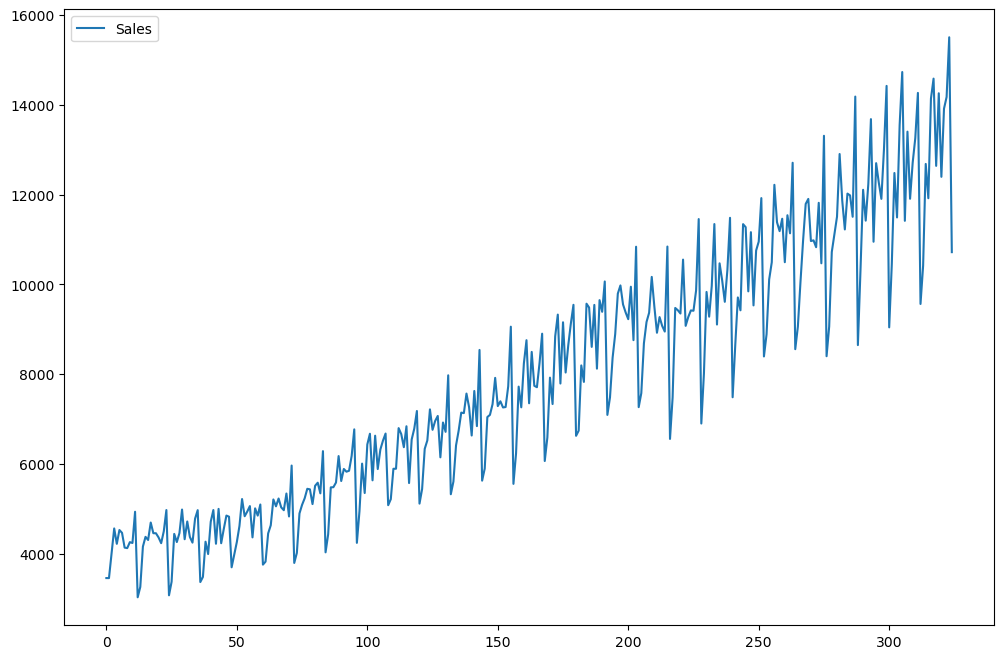

In [33]:
df.columns=['DATE','Sales']
df.plot(figsize=(12,8))

In [34]:
df

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [35]:
df['Sale_LastMonth']=df['Sales'].shift(+1)

In [36]:
df['Sale_2Monthsback']=df['Sales'].shift(+2)

In [37]:
df['Sale_3Monthback']=df['Sales'].shift(+3)

In [38]:
df

,DATE,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
0,1992-01-01,3459,NaN,NaN,NaN
1,1992-02-01,3458,3459.0,NaN,NaN
2,1992-03-01,4002,3458.0,3459.0,NaN
3,1992-04-01,4564,4002.0,3458.0,3459.0
4,1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...,...
320,2018-09-01,12396,14257.0,12640.0,14583.0
321,2018-10-01,13914,12396.0,14257.0,12640.0
322,2018-11-01,14174,13914.0,12396.0,14257.0
323,2018-12-01,15504,14174.0,13914.0,12396.0


In [39]:
df=df.dropna()
df

,DATE,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
3,1992-04-01,4564,4002.0,3458.0,3459.0
4,1992-05-01,4221,4564.0,4002.0,3458.0
5,1992-06-01,4529,4221.0,4564.0,4002.0
6,1992-07-01,4466,4529.0,4221.0,4564.0
7,1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...,...
320,2018-09-01,12396,14257.0,12640.0,14583.0
321,2018-10-01,13914,12396.0,14257.0,12640.0
322,2018-11-01,14174,13914.0,12396.0,14257.0
323,2018-12-01,15504,14174.0,13914.0,12396.0


In [40]:
x=df.iloc[:,2:]

In [41]:
x

,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthback
3,4002.0,3458.0,3459.0
4,4564.0,4002.0,3458.0
5,4221.0,4564.0,4002.0
6,4529.0,4221.0,4564.0
7,4466.0,4529.0,4221.0
...,...,...,...
320,14257.0,12640.0,14583.0
321,12396.0,14257.0,12640.0
322,13914.0,12396.0,14257.0
323,14174.0,13914.0,12396.0


In [42]:
y=df.iloc[:,1:2]

In [43]:
y

,Sales
3,4564
4,4221
5,4529
6,4466
7,4137
...,...
320,12396
321,13914
322,14174
323,15504


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)
ytrain=scaler.fit_transform(ytrain)
ytest=scaler.fit_transform(ytest)

In [47]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
# Step 5: Build and train the MLP model
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [49]:
model.fit(xtrain,ytrain,epochs=100,batch_size=5)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0641 - mean_absolute_error: 0.1930   
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0720 
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0095 - mean_absolute_error: 0.0714
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.0092 - mean_absolute_error: 0.0686
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.0078 - mean_absolute_error: 0.0659   
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - mean_absolute_error: 0.0685
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0074 - mean_absolute_error: 0.0616
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0088 - mean_absolute_error: 0.0713
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0069 - mean_absolute_error: 0.0592
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0079 - mean_absolute_error: 0.0640
Epoch 11/100
45/45

In [50]:
predict=model.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [51]:
predict

array([[0.11784105],
       [0.6759857 ],
       [0.73174953],
       [0.5593796 ],
       [0.45208752],
       [0.6278564 ],
       [0.6825093 ],
       [0.48639372],
       [0.3326214 ],
       [0.68505585],
       [0.2914215 ],
       [0.3904107 ],
       [0.13040432],
       [0.5131076 ],
       [0.68933105],
       [0.58589655],
       [0.3183806 ],
       [0.14393455],
       [0.1881693 ],
       [0.63638574],
       [0.8003839 ],
       [0.177436  ],
       [0.46430963],
       [0.30081716],
       [0.11463187],
       [0.12530802],
       [0.1825807 ],
       [0.64507836],
       [0.2410278 ],
       [0.5261927 ],
       [0.77727413],
       [0.66642684],
       [0.15713808],
       [0.09801481],
       [0.3673294 ],
       [0.28586516],
       [0.31724894],
       [0.13724037],
       [0.16360942],
       [0.34180975],
       [0.02181321],
       [0.16173124],
       [0.3425478 ],
       [0.12328488],
       [0.30445462],
       [0.5346187 ],
       [0.11965612],
       [0.131

In [52]:
import matplotlib.pyplot as plt

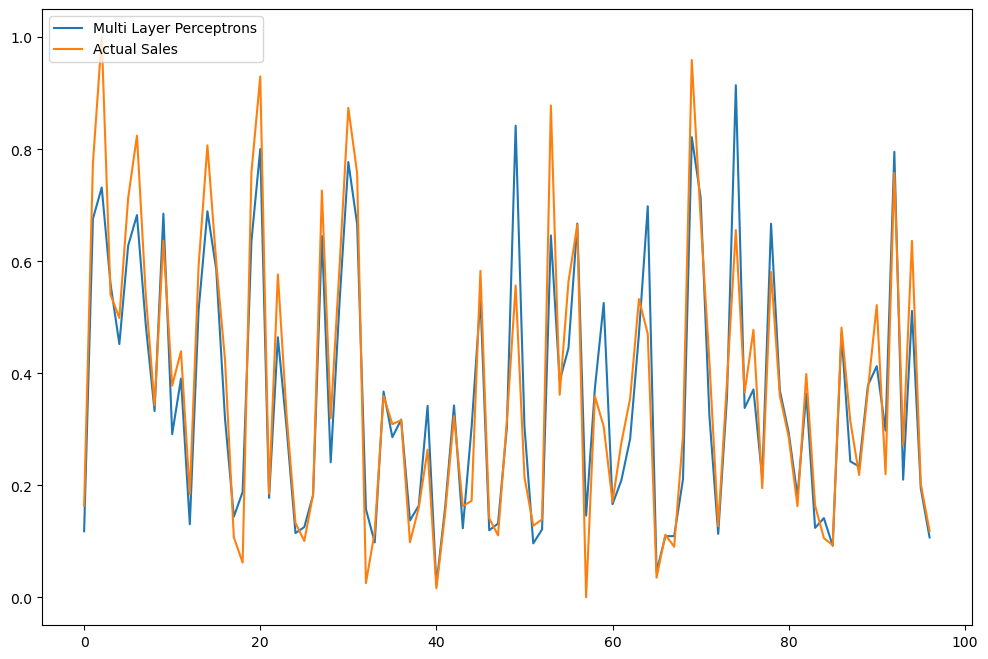

In [53]:
plt.figure(figsize=(12,8))
plt.plot(predict,label = 'Multi Layer Perceptrons')
plt.plot(ytest,label = 'Actual Sales')
plt.legend(loc= 'upper left')
plt.show()

In [54]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    return model

In [55]:
from scikeras.wrappers import KerasRegressor


In [56]:
model = KerasRegressor(model=create_model, loss='mean_squared_error', epochs=100, batch_size=10, verbose=0)

In [57]:
from sklearn.model_selection import GridSearchCV


In [58]:
xtrain.dtype,ytrain.dtype

(dtype('float64'), dtype('float64'))

In [59]:
xtrain.shape,ytrain.shape

((225, 3), (225, 1))

In [60]:
#Input(shape=(input_dim,)),  # Dynamically set the input shape

In [61]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [62]:
input_dim = xtrain.shape[1]

In [63]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Input

def create_model(input_dim, optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input shape
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrapping the Keras model using KerasClassifier
model = KerasRegressor(build_fn=create_model, input_dim=xtrain.shape[1], verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer' :['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'batch_size': [5, 10],
    'epochs': [100, 200]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(xtrain, ytrain)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

Best: 0.837797 using {'batch_size': 5, 'epochs': 200, 'optimizer': 'Adadelta'}
0.827960 (0.020810) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'SGD'}
0.834185 (0.026412) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'RMSprop'}
0.825318 (0.022025) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adagrad'}
0.827354 (0.022444) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adadelta'}
0.836980 (0.020630) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adam'}
0.832815 (0.030092) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adamax'}
0.832718 (0.017317) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Nadam'}
0.836074 (0.024553) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'SGD'}
0.833609 (0.026832) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'RMSprop'}
0.821459 (0.023893) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'Adagrad'}
0.837797 (0.021416) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'Adadelta'}
0.831116 (0.025348) 

### Now save this model

In [64]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='Adagrad', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(xtrain,ytrain,epochs=200,batch_size=5)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3447 - mean_absolute_error: 0.5040   
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2791 - mean_absolute_error: 0.4430 
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2299 - mean_absolute_error: 0.4068
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2180 - mean_absolute_error: 0.3878 
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1901 - mean_absolute_error: 0.3625 
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1677 - mean_absolute_error: 0.3434 
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1529 - mean_absolute_error: 0.3264 
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1452 - mean_absolute_error: 0.3080 
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1394 - mean_absolute_error: 0.3006 
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1323 - mean_absolute_error: 0.2917 
Epoch 11/200
45/45 ━━━━━━━━━

In [65]:
import joblib
filename = 'timeSeries.sav'
joblib.dump(model,filename)


['timeSeries.sav']

In [66]:
loadedModel = joblib.load('timeSeries.sav')

In [67]:
loadedModel.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.15037003],
       [0.58563715],
       [0.7114291 ],
       [0.53792703],
       [0.5910654 ],
       [0.62041074],
       [0.6142234 ],
       [0.4557938 ],
       [0.33247432],
       [0.64632547],
       [0.4877719 ],
       [0.36822984],
       [0.15266365],
       [0.48873445],
       [0.6033544 ],
       [0.5367123 ],
       [0.52634174],
       [0.1684286 ],
       [0.21683484],
       [0.5928238 ],
       [0.7640937 ],
       [0.19842324],
       [0.4370632 ],
       [0.3086466 ],
       [0.13495058],
       [0.1625301 ],
       [0.27269608],
       [0.62908685],
       [0.2495423 ],
       [0.506622  ],
       [0.72018427],
       [0.62603325],
       [0.17793839],
       [0.11413141],
       [0.35901445],
       [0.28914595],
       [0.31929943],
       [0.14041847],
       [0.19292283],
       [0.33583847],
       [0.1380431 ],
       [0.17900373],
       [0.345478  ],
       [0.15284392],
       [0.30556604],
       [0.50895226],
       [0.17128533],
       [0.160